In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [50]:
df=pd.read_csv("/content/anaemia_disease_detection.csv")

In [51]:
df.head(5)

,Number,Sex,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
0,1,M,43.2555,30.8421,25.9025,6.3,Yes
1,2,F,45.6033,28.1900,26.2067,13.5,No
2,3,F,45.0107,28.9677,26.0215,11.7,No
3,4,F,44.5398,28.9899,26.4703,13.5,No
4,5,M,43.2870,30.6972,26.0158,12.4,No


In [52]:
df.drop(['Number'],axis=1,inplace=True)

In [53]:
df.isna().sum()

Sex             0
%Red Pixel      0
%Green pixel    0
%Blue pixel     0
Hb              0
Anaemic         0
dtype: int64

In [54]:
df.shape

(104, 6)

In [55]:
df.describe()

,%Red Pixel,%Green pixel,%Blue pixel,Hb
count,104.000000,104.000000,104.000000,104.000000
mean,45.654175,28.875507,25.470325,12.150962
std,2.816294,1.554275,1.984671,2.512957
min,38.796800,25.140300,19.541300,2.800000
25%,43.911375,27.871300,24.896425,10.650000
50%,45.385350,28.948750,25.953200,12.600000
75%,46.968325,29.887275,26.721600,14.000000
max,54.647800,32.368100,29.841400,16.300000


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sex           104 non-null    object 
 1   %Red Pixel    104 non-null    float64
 2   %Green pixel  104 non-null    float64
 3   %Blue pixel   104 non-null    float64
 4   Hb            104 non-null    float64
 5   Anaemic       104 non-null    object 
dtypes: float64(4), object(2)
memory usage: 5.0+ KB


In [57]:
# Print unique values in each column
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in '{column}': {unique_values}")

Unique values in 'Sex': ['M' 'F' 'F ' 'M ']
Unique values in '%Red Pixel': [43.2555 45.6033 45.0107 44.5398 43.287  45.0994 43.1457 43.6103 45.0423
 46.5143 45.3506 44.4062 44.9642 45.0484 46.9942 45.5842 42.5358 44.0957
 45.7104 40.9365 44.9116 43.4225 43.3019 47.6372 45.6906 43.4098 44.4252
 44.3297 47.8913 42.2473 44.2572 48.6358 42.1652 45.4434 42.1528 45.2588
 46.4081 47.2275 47.3642 46.1449 41.7122 47.9777 46.7628 44.9526 44.1868
 46.9428 48.8523 45.7581 48.5356 45.5833 45.9659 44.0418 43.9633 47.1003
 46.0477 46.2133 49.1475 45.7986 40.6395 50.3562 43.9224 45.0693 45.8483
 43.4837 38.7968 45.4201 44.1609 42.5892 46.9597 44.1995 41.133  52.9108
 50.4976 44.72   53.9113 49.5899 45.9707 42.4532 44.3346 43.8783 42.8269
 43.1335 45.4735 50.4801 46.255  46.7979 46.5811 54.6478 48.8763 46.3745
 43.1425 49.5037 47.7549 42.5314 52.154  51.5802 48.3681 47.326  49.9999
 42.2324 45.6064 45.2095 43.5706]
Unique values in '%Green pixel': [30.8421 28.19   28.9677 28.9899 30.6972 27.9645 30.162

In [58]:
# Strip whitespace and convert to uppercase
df['Sex'] = df['Sex'].str.strip().str.upper()

# Print unique values in 'Sex' column after cleaning
unique_values_sex = df['Sex'].unique()
print(f"Unique values in 'Sex': {unique_values_sex}")

Unique values in 'Sex': ['M' 'F']


In [59]:
df.drop_duplicates(inplace=True)

# **EDA**

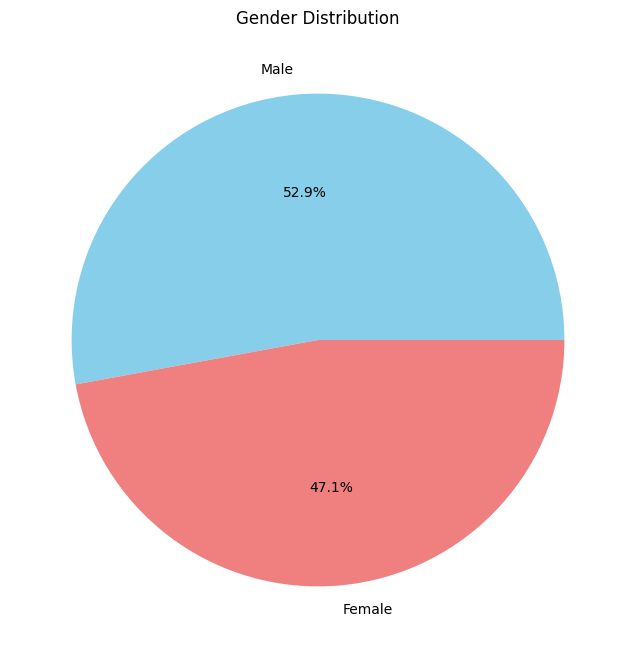

In [60]:
plt.figure(figsize=(8, 8))
df['Sex'].value_counts().plot.pie(autopct='%1.1f%%', colors=['skyblue', 'lightcoral'], labels=['Male', 'Female'])
plt.title('Gender Distribution')
plt.ylabel('')
plt.show()

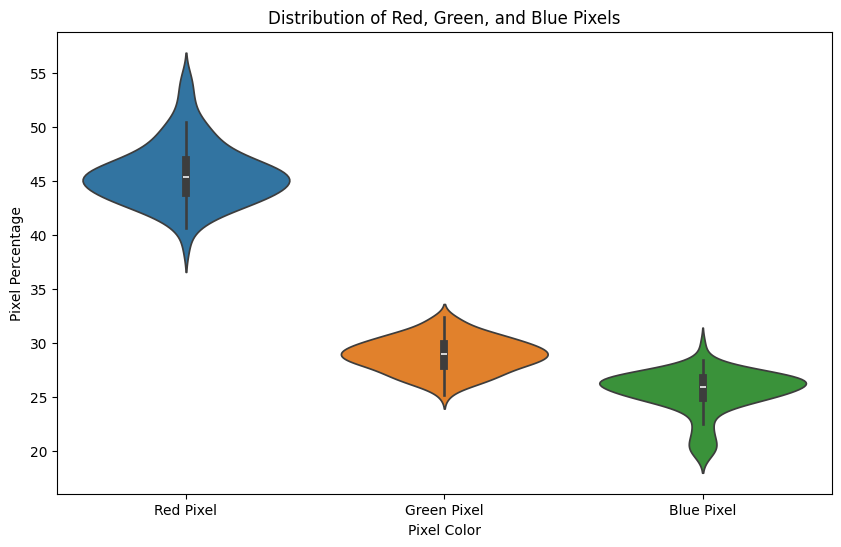

In [61]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df[['%Red Pixel', '%Green pixel', '%Blue pixel']])
plt.title('Distribution of Red, Green, and Blue Pixels')
plt.ylabel('Pixel Percentage')
plt.xlabel('Pixel Color')
plt.xticks([0, 1, 2], ['Red Pixel', 'Green Pixel', 'Blue Pixel'])
plt.show()

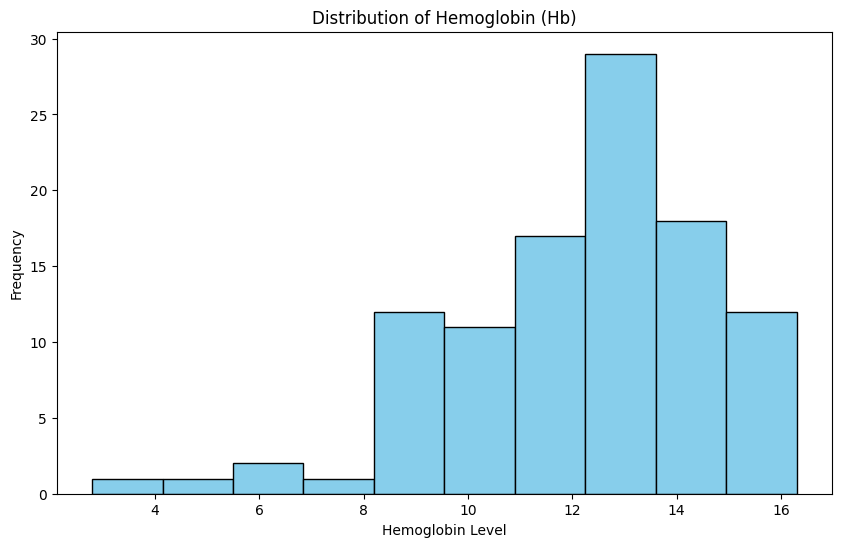

In [62]:
plt.figure(figsize=(10, 6))
plt.hist(df['Hb'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Hemoglobin (Hb)')
plt.xlabel('Hemoglobin Level')
plt.ylabel('Frequency')
plt.show()

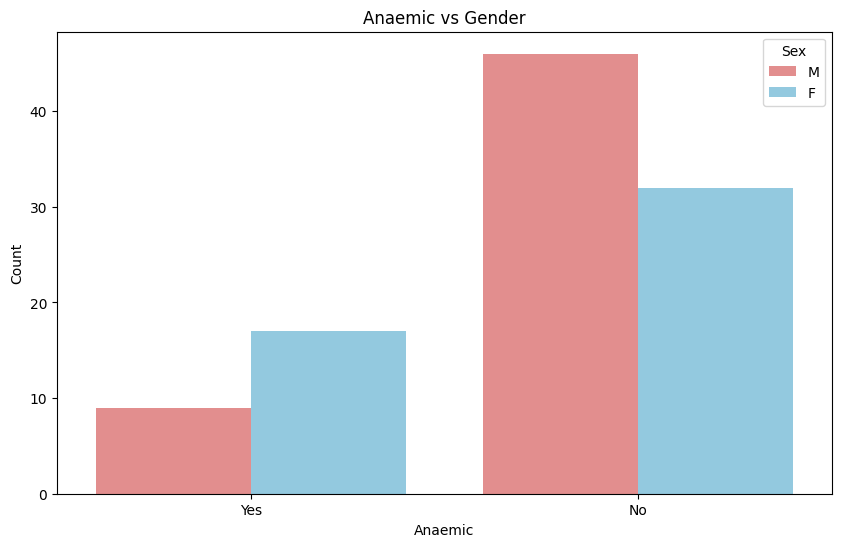

In [63]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Anaemic', hue='Sex', data=df, palette=['lightcoral', 'skyblue'])
plt.title('Anaemic vs Gender')
plt.xlabel('Anaemic')
plt.ylabel('Count')
plt.show()

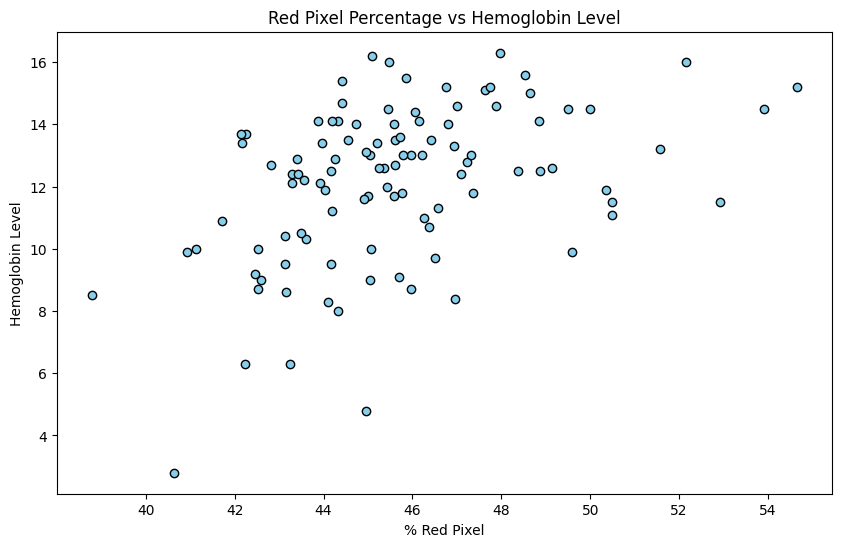

In [64]:
plt.figure(figsize=(10, 6))
plt.scatter(df['%Red Pixel'], df['Hb'], color='skyblue', edgecolor='black')
plt.title('Red Pixel Percentage vs Hemoglobin Level')
plt.xlabel('% Red Pixel')
plt.ylabel('Hemoglobin Level')
plt.show()

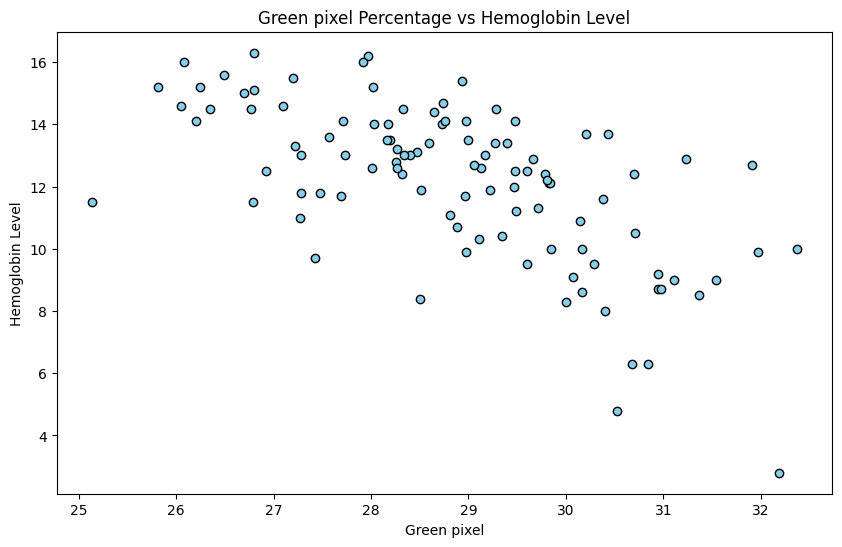

In [66]:
plt.figure(figsize=(10, 6))
plt.scatter(df['%Green pixel'], df['Hb'], color='skyblue', edgecolor='black')
plt.title('Green pixel Percentage vs Hemoglobin Level')
plt.xlabel('Green pixel')
plt.ylabel('Hemoglobin Level')
plt.show()

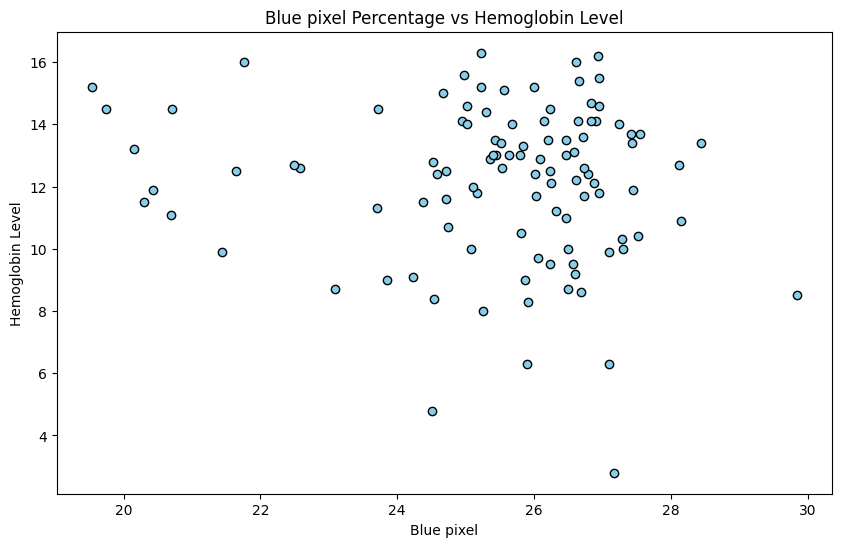

In [67]:
plt.figure(figsize=(10, 6))
plt.scatter(df['%Blue pixel'], df['Hb'], color='skyblue', edgecolor='black')
plt.title('Blue pixel Percentage vs Hemoglobin Level')
plt.xlabel('Blue pixel')
plt.ylabel('Hemoglobin Level')
plt.show()

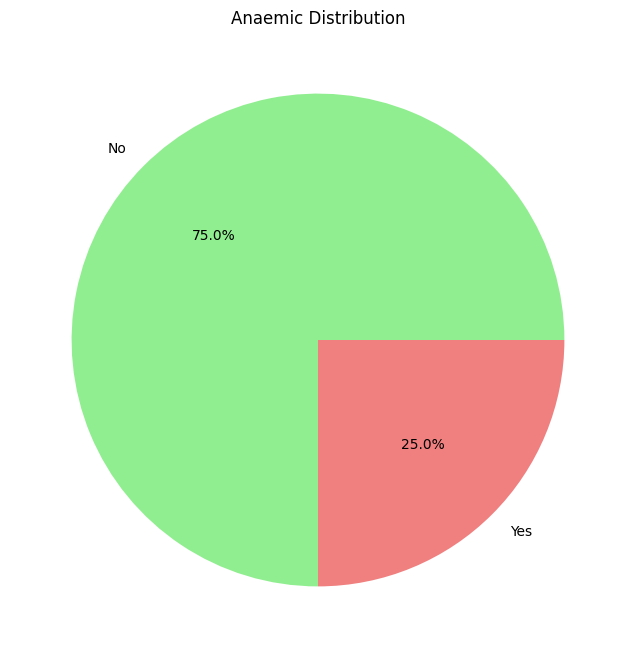

In [68]:
plt.figure(figsize=(8, 8))
df['Anaemic'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'], labels=['No', 'Yes'])
plt.title('Anaemic Distribution')
plt.ylabel('')
plt.show()

In [69]:
df['Anaemic'].value_counts()

Anaemic
No     78
Yes    26
Name: count, dtype: int64

In [70]:
from imblearn.over_sampling import SMOTE
# Encode categorical variables
df['Sex'] = df['Sex'].map({'M': 0, 'F': 1})
df['Anaemic'] = df['Anaemic'].map({'No': 0, 'Yes': 1})

# Define features and target variable
X = df.drop(['Anaemic'], axis=1)
y = df['Anaemic']

# Perform SMOTE oversampling
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Create a new DataFrame with the oversampled data
df = pd.DataFrame(X_res, columns=X.columns)
df['Anaemic'] = y_res

# Decode the 'Sex' and 'Anaemic' columns back to their original values
df['Sex'] = df['Sex'].map({0: 'M', 1: 'F'})
df['Anaemic'] = df['Anaemic'].map({0: 'No', 1: 'Yes'})

In [75]:
from sklearn.preprocessing import LabelEncoder
# Initialize the label encoder
label_encoder = LabelEncoder()

# Encode 'Sex' column
df['Sex'] = label_encoder.fit_transform(df['Sex'])

# Encode 'Anaemic' column
df['Anaemic'] = label_encoder.fit_transform(df['Anaemic'])

In [76]:
df.head()

,Sex,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
0,1,43.2555,30.8421,25.9025,6.3,1
1,0,45.6033,28.1900,26.2067,13.5,0
2,0,45.0107,28.9677,26.0215,11.7,0
3,0,44.5398,28.9899,26.4703,13.5,0
4,1,43.2870,30.6972,26.0158,12.4,0


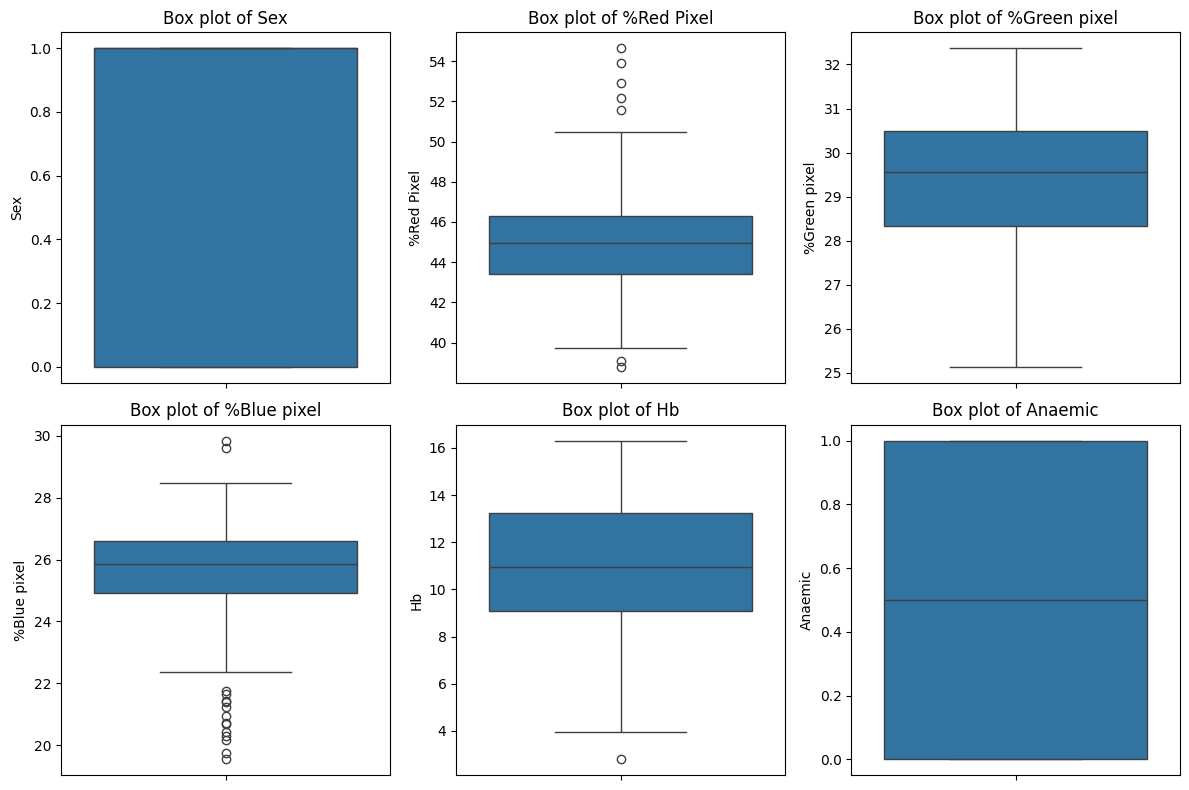

In [77]:
# Plot initial box plots
plt.figure(figsize=(12, 8))
for i, column in enumerate(df.columns):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=df[column])
    plt.title(f'Box plot of {column}')

plt.tight_layout()
plt.show()

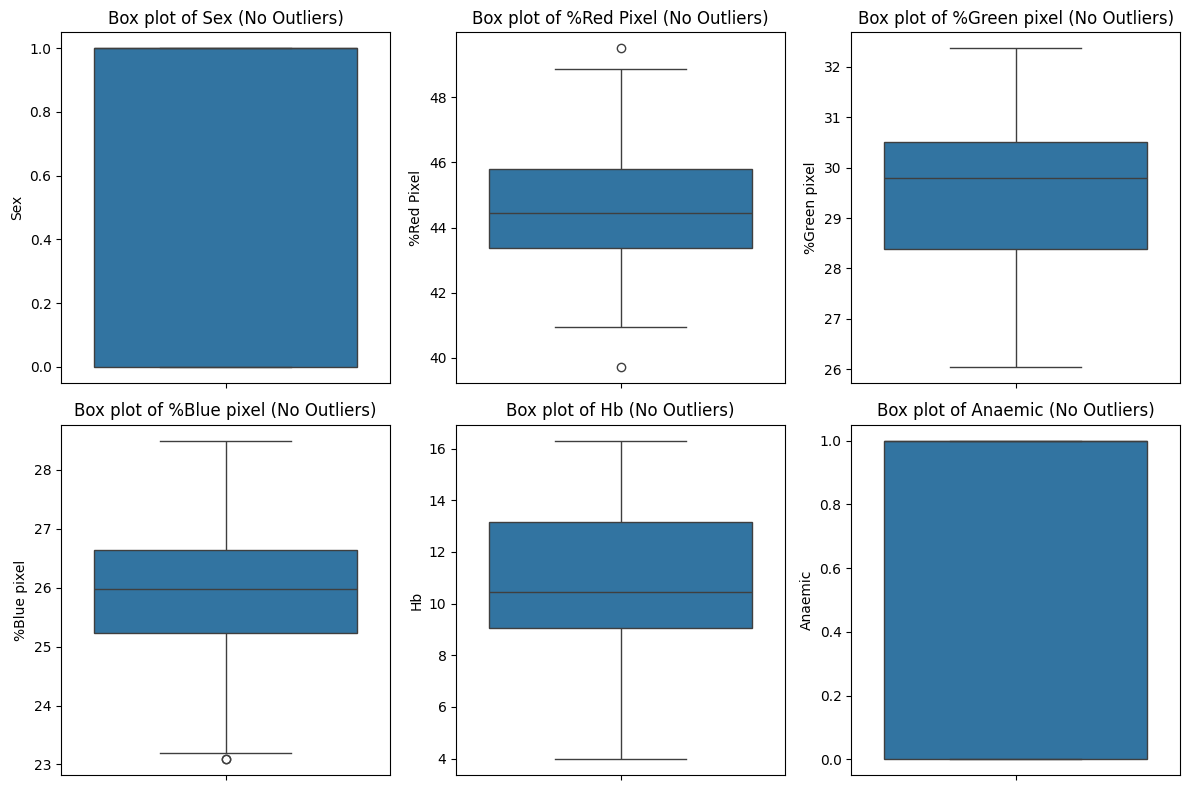

In [79]:
# Function to remove outliers
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Remove outliers
columns_to_check = ['%Red Pixel', '%Green pixel', '%Blue pixel', 'Hb']
df_no_outliers = remove_outliers(df, columns_to_check)

# Plot box plots after removing outliers
plt.figure(figsize=(12, 8))
for i, column in enumerate(df_no_outliers.columns):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=df_no_outliers[column])
    plt.title(f'Box plot of {column} (No Outliers)')

plt.tight_layout()
plt.show()

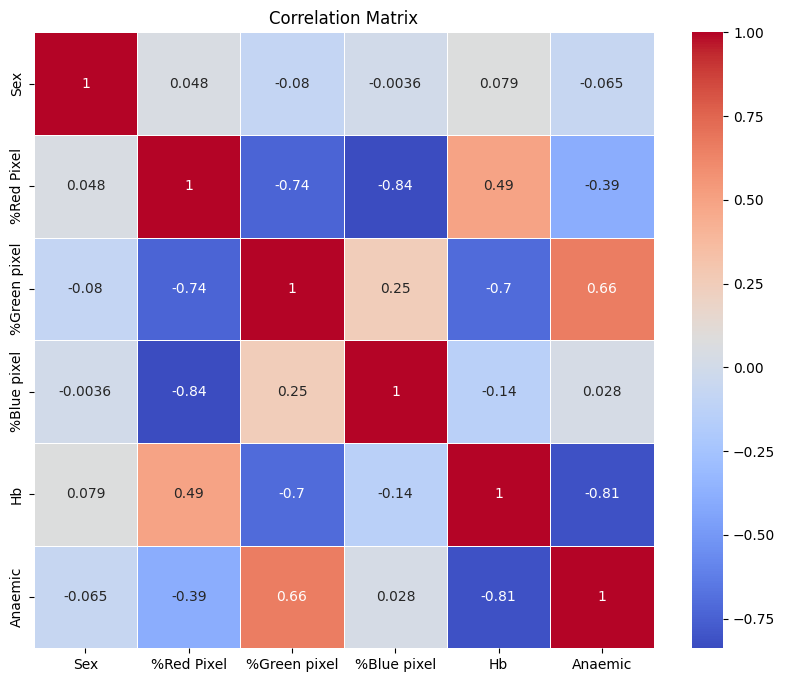

In [80]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# **Random Forest**

Accuracy: 0.96875
Precision: 1.0
Recall: 0.9444444444444444
F1 Score: 0.9714285714285714
Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.94      0.97        18

    accuracy                           0.97        32
   macro avg       0.97      0.97      0.97        32
weighted avg       0.97      0.97      0.97        32

Confusion Matrix:
[[14  0]
 [ 1 17]]


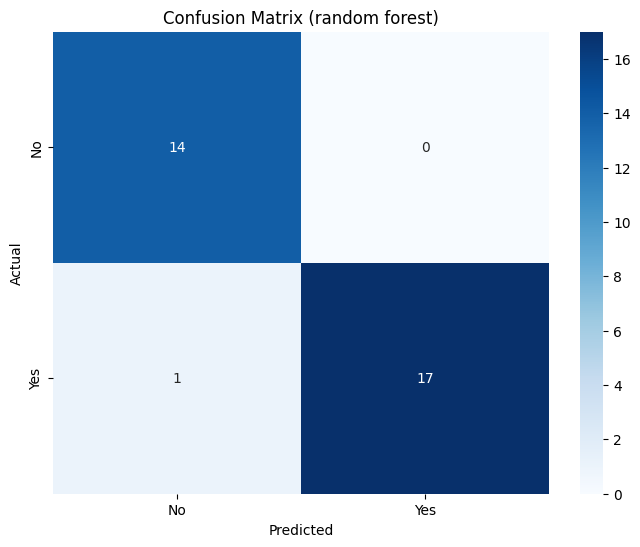

In [104]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
# Define the features (X) and the target (y)
X = df.drop('Anaemic', axis=1)
y = df['Anaemic']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the Random Forest model
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)

# Make predictions
y_pred = model_rf.predict(X_test)

# Calculate evaluation metrics
accuracy_rf = accuracy_score(y_test, y_pred)
precision_rf = precision_score(y_test, y_pred)
recall_rf = recall_score(y_test, y_pred)
f1_score_rf = f1_score(y_test, y_pred)
classification_report_rf = classification_report(y_test, y_pred)
confusion_matrix_rf = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy_rf}")
print(f"Precision: {precision_rf}")
print(f"Recall: {recall_rf}")
print(f"F1 Score: {f1_score_rf}")
print("Classification Report:")
print(classification_report_rf)
print("Confusion Matrix:")
print(confusion_matrix_rf)

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (random forest)')
plt.show()

# **GBM**

Accuracy: 0.9375
Precision: 1.0
Recall: 0.8888888888888888
F1 Score: 0.9411764705882353
Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.93        14
           1       1.00      0.89      0.94        18

    accuracy                           0.94        32
   macro avg       0.94      0.94      0.94        32
weighted avg       0.95      0.94      0.94        32

Confusion Matrix:
[[14  0]
 [ 2 16]]


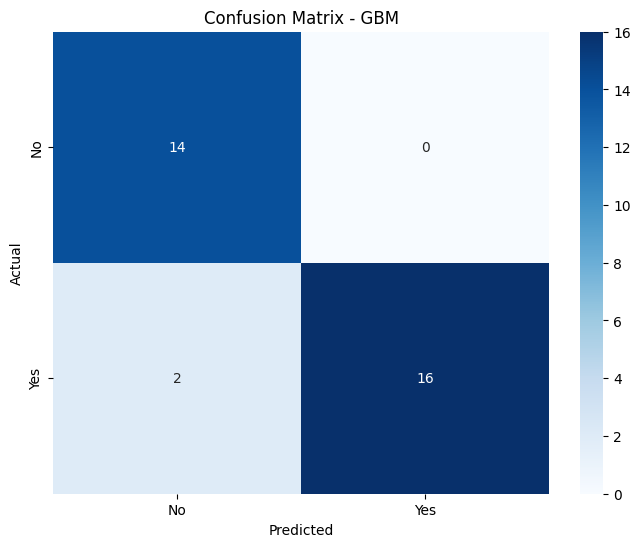

In [89]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize and fit the GBM model
model_gbm = GradientBoostingClassifier(random_state=42)
model_gbm.fit(X_train, y_train)

# Make predictions
y_pred = model_gbm.predict(X_test)

# Calculate evaluation metrics
accuracy_gbm = accuracy_score(y_test, y_pred)
precision_gbm = precision_score(y_test, y_pred)
recall_gbm = recall_score(y_test, y_pred)
f1_score_gbm = f1_score(y_test, y_pred)
classification_report_gbm = classification_report(y_test, y_pred)
confusion_matrix_gbm = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy_gbm}")
print(f"Precision: {precision_gbm}")
print(f"Recall: {recall_gbm}")
print(f"F1 Score: {f1_score_gbm}")
print("Classification Report:")
print(classification_report_gbm)
print("Confusion Matrix:")
print(confusion_matrix_gbm)

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_gbm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - GBM')
plt.show()


# **SVM**

Accuracy: 0.96875
Precision: 1.0
Recall: 0.9444444444444444
F1 Score: 0.9714285714285714
Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.94      0.97        18

    accuracy                           0.97        32
   macro avg       0.97      0.97      0.97        32
weighted avg       0.97      0.97      0.97        32

Confusion Matrix:
[[14  0]
 [ 1 17]]


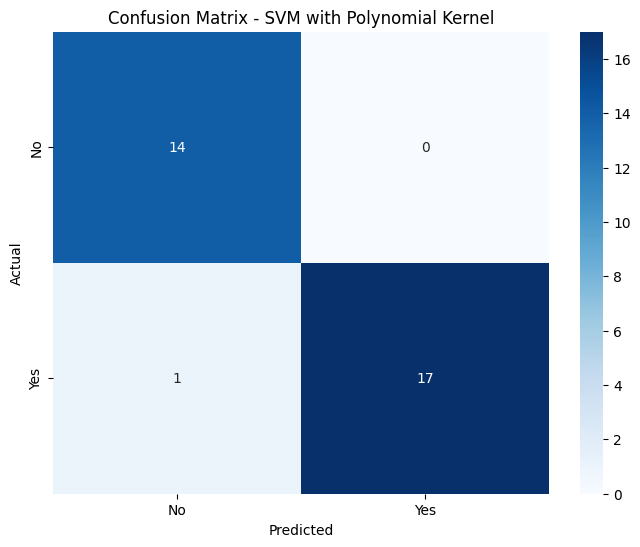

In [101]:
from sklearn.svm import SVC

# Initialize and fit the SVM model with polynomial kernel
model_svm_poly = SVC(kernel='poly', random_state=42,probability=True)
model_svm_poly.fit(X_train, y_train)

# Make predictions
y_pred = model_svm_poly.predict(X_test)

# Calculate evaluation metrics
accuracy_svm_poly = accuracy_score(y_test, y_pred)
precision_svm_poly = precision_score(y_test, y_pred)
recall_svm_poly = recall_score(y_test, y_pred)
f1_score_svm_poly = f1_score(y_test, y_pred)
classification_report_svm_poly = classification_report(y_test, y_pred)
confusion_matrix_svm_poly = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy_svm_poly}")
print(f"Precision: {precision_svm_poly}")
print(f"Recall: {recall_svm_poly}")
print(f"F1 Score: {f1_score_svm_poly}")
print("Classification Report:")
print(classification_report_svm_poly)
print("Confusion Matrix:")
print(confusion_matrix_svm_poly)

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_svm_poly, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - SVM with Polynomial Kernel')
plt.show()


Accuracy: 0.875
Precision: 1.0
Recall: 0.7777777777777778
F1 Score: 0.8750000000000001
Classification Report:
              precision    recall  f1-score   support

           0       0.78      1.00      0.88        14
           1       1.00      0.78      0.88        18

    accuracy                           0.88        32
   macro avg       0.89      0.89      0.88        32
weighted avg       0.90      0.88      0.88        32

Confusion Matrix:
[[14  0]
 [ 4 14]]


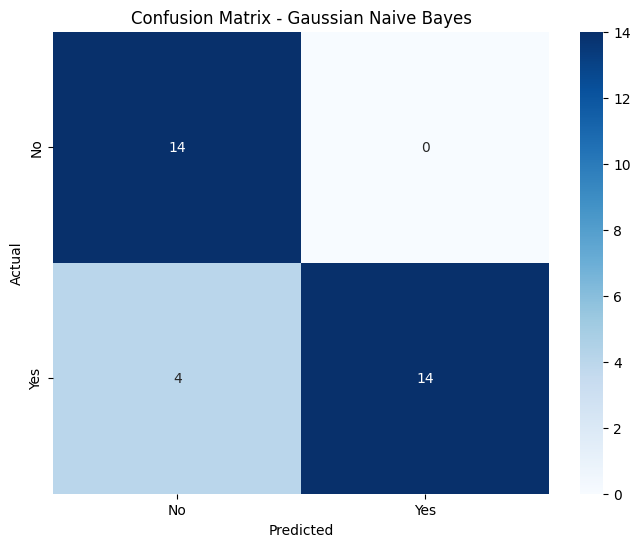

In [95]:
from sklearn.naive_bayes import GaussianNB

# Initialize and fit the Gaussian Naive Bayes model
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)

# Make predictions
y_pred = model_nb.predict(X_test)

# Calculate evaluation metrics
accuracy_nb = accuracy_score(y_test, y_pred)
precision_nb = precision_score(y_test, y_pred)
recall_nb = recall_score(y_test, y_pred)
f1_score_nb = f1_score(y_test, y_pred)
classification_report_nb = classification_report(y_test, y_pred)
confusion_matrix_nb = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy_nb}")
print(f"Precision: {precision_nb}")
print(f"Recall: {recall_nb}")
print(f"F1 Score: {f1_score_nb}")
print("Classification Report:")
print(classification_report_nb)
print("Confusion Matrix:")
print(confusion_matrix_nb)

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_nb, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Gaussian Naive Bayes')
plt.show()


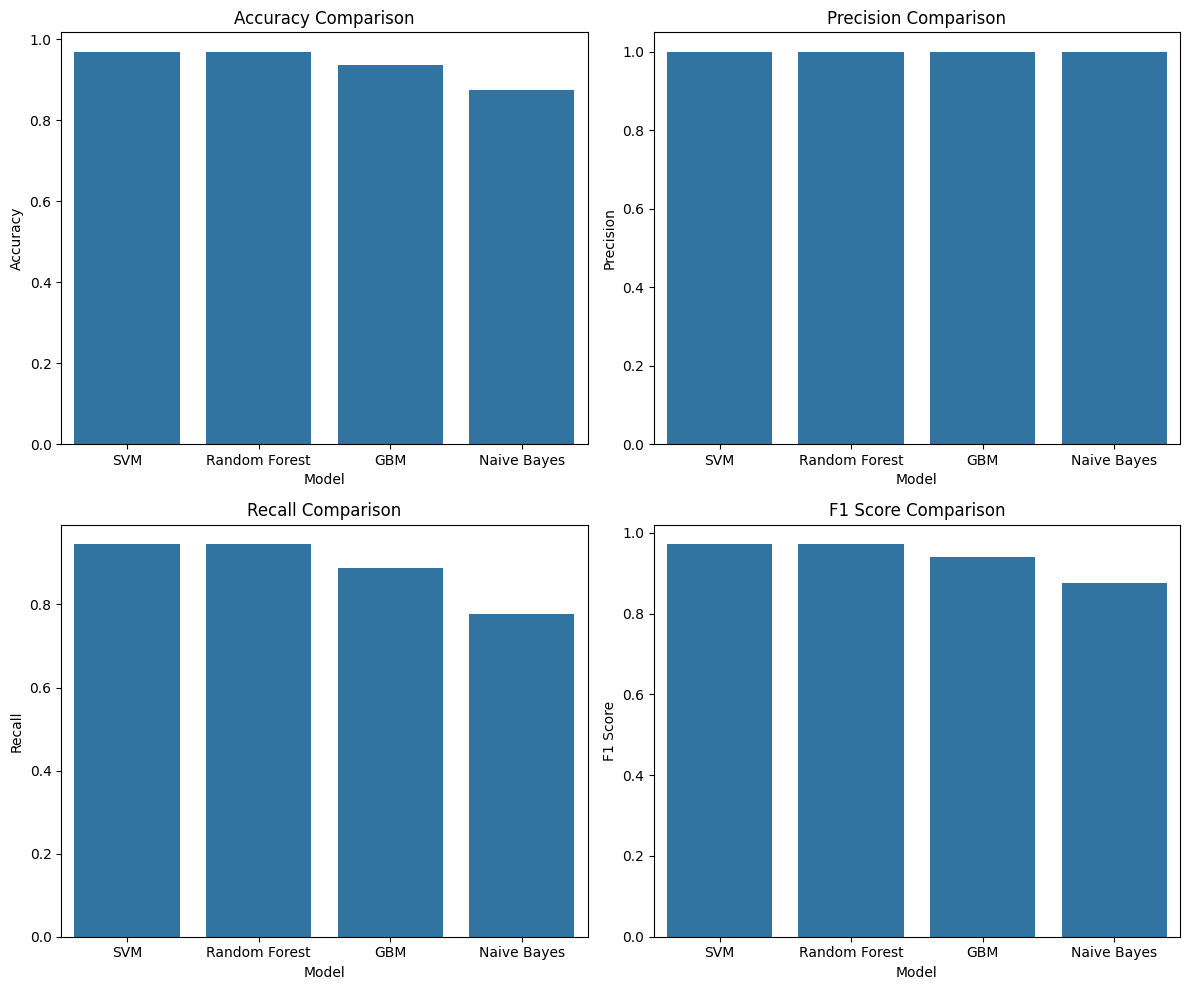

In [102]:
# Calculate evaluation metrics for each model
metrics = {
    'Model': ['SVM', 'Random Forest', 'GBM', 'Naive Bayes'],
    'Accuracy': [accuracy_svm_poly,accuracy_rf,accuracy_gbm,accuracy_nb],
    'Precision': [precision_svm_poly,precision_rf,precision_gbm,precision_nb],
    'Recall': [recall_svm_poly,recall_rf,recall_gbm,recall_nb],
    'F1 Score': [f1_score_svm_poly,f1_score_rf,f1_score_gbm,f1_score_nb]
}
metrics_df = pd.DataFrame(metrics)
# Plot count plots for Accuracy, Precision, Recall, and F1 Score
plt.figure(figsize=(12, 10))

# Accuracy
plt.subplot(2, 2, 1)
sns.barplot(x='Model', y='Accuracy', data=metrics_df)
plt.title('Accuracy Comparison')

# Precision
plt.subplot(2, 2, 2)
sns.barplot(x='Model', y='Precision', data=metrics_df)
plt.title('Precision Comparison')

# Recall
plt.subplot(2, 2, 3)
sns.barplot(x='Model', y='Recall', data=metrics_df)
plt.title('Recall Comparison')

# F1 Score
plt.subplot(2, 2, 4)
sns.barplot(x='Model', y='F1 Score', data=metrics_df)
plt.title('F1 Score Comparison')

plt.tight_layout()
plt.show()


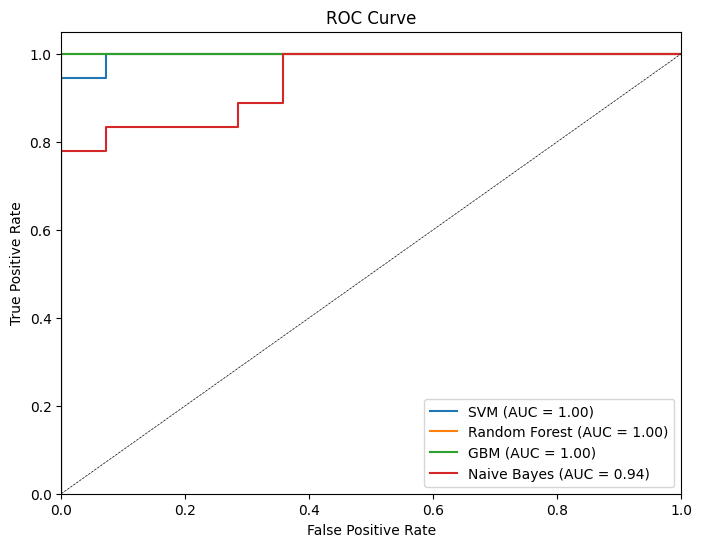

In [103]:
from sklearn.metrics import  roc_curve, auc
# Calculate ROC curve and AUC for each model
plt.figure(figsize=(8, 6))

for model_name, model in [('SVM', model_svm_poly), ('Random Forest', model_rf), ('GBM', model_gbm), ('Naive Bayes', model_nb)]:
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', linewidth=0.5)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


In [105]:
from joblib import dump
# Assuming model_rf is already trained and saved
dump(model_rf, 'model_rf.joblib')

['model_rf.joblib']

In [108]:
from joblib import load
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the saved model
model_rf = load('model_rf.joblib')

# Define a function to handle user input and predict anemia status
def predict_anemia():
    # Take input from the user
    sex = input("Enter your gender (M/F): ").strip().upper()
    red_pixel = float(input("Enter the %Red Pixel value: "))
    green_pixel = float(input("Enter the %Green Pixel value: "))
    blue_pixel = float(input("Enter the %Blue Pixel value: "))
    Hb = float(input("Enter the Hb value: "))

    # Create a DataFrame with user input
    user_input = {
        'Sex': sex,
        '%Red Pixel': red_pixel,
        '%Green pixel': green_pixel,
        '%Blue pixel': blue_pixel,
        'Hb': Hb
    }
    user_df = pd.DataFrame([user_input])

    # Label encode 'Sex' column
    label_encoder = LabelEncoder()
    user_df['Sex'] = label_encoder.fit_transform(user_df['Sex'])

    # Ensure the columns are in the same order as the model expects
    X_user = user_df[model_rf.feature_names_in_]  # Assuming model_rf has 'feature_names_in_' attribute

    # Make predictions
    prediction = model_rf.predict(X_user)[0]

    # Interpret predictions
    if prediction == 1:
        print("You are predicted to be suffering from anemia.")
    else:
        print("You are predicted not to be suffering from anemia.")

# Call the function to predict anemia status based on user input
predict_anemia()


Enter your gender (M/F): M
Enter the %Red Pixel value: 45.5
Enter the %Green Pixel value: 30.5
Enter the %Blue Pixel value: 24
Enter the Hb value: 13.89
You are predicted not to be suffering from anemia.
